# Likelihood（似然）

参考：
- [如何通俗地理解概率论中的「极大似然估计法」?](https://www.zhihu.com/question/24124998/answer/242682386)

**Linkelihood**（似然）是概率统计学中的概念，指的是在已知概率分布的情况下，通过观察到的实验数据，来反推概率分布函数中的参数。

比如在抛硬币的实验中，我们想知道这枚硬币是否是公平的，于是做了实验，抛了硬币10次得到如下结果：HHTHHHTHTH

现在我们假设得到正面即H的概率为 $\theta$，那么反面T的概率即为 $1-\theta$，那么根据上面的实验结果，其概率应为：$\theta^7(1-\theta)^3$。

我们假设这枚硬币是均匀的，也就是说 $\theta=0.5$，带入上面的公式：$0.5^7 \times (1-0.5)^3=0.0009765625$

再假设他不是均匀的，设 $\theta=0.6$, 带入上面的公式：$0.6^7 \times (1-0.6)^3=0.0017915904$

$\frac{0.0017915904}{0.0009765625}=1.835$，可以看到我们假设 $\theta=0.6$ 得到的最终概率比 我们假设 $\theta=0.5$ 的概率高了1.835倍，从而基本可以断定这枚硬币不是一个公平的硬币

接着，如果我们想知道根据这次实验得到的结果，得到正面的概率最可能应该是多少呢？我们可以根据 $\theta^7(1-\theta)^3$ 来建立一个函数 $f(\theta)=\theta^7(1-\theta)^3$，这个函数就是**似然函数**

接着我们将这个**似然函数**用图形表示处理如下：

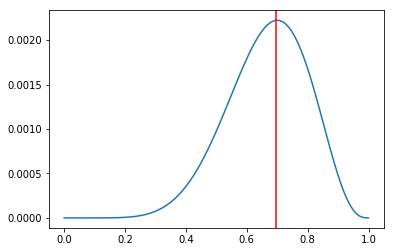

In [13]:
# 导入必要的功能库
import numpy as np
import matplotlib.pyplot as plt

# 创建数据
theta = np.linspace(0, 1, 100)
f_theta = theta**7 * (1-theta)**3

# 获取是的函数结果最大的theta值
f_theta_max_idx = f_theta.argmax()
theta_max = theta[f_theta_max_idx]

# 画似然函数图
plt.plot(theta, f_theta)
plt.axvline(theta_max, c='r')
plt.show()

从上面的结果可以看出，此次试验的结果可以推出，这枚硬币不是一个公平的硬币，因为正面的概率接近70%（反面的概率接近30%）

求能使**似然函数**最大化的方式称作**最大似然预估**

## 最大似然预估

- 一次试验：抛硬币10次，出现6次正面，就是一次试验。
- 二项分布：抛硬币10次，出现6次正面的概率为0.25，出现5次正面的概率为0.21，所有可能的结果的概率，放在一起就是二项分布

> 二项式概率分布公式：
> $b(x,n,p)=\binom{n}{x}p^x(1-p)^{n-x}$
> - x: 成功的次数
> - n: 试验的次数
> - p: 出现某结果的概率

比如抛硬币10次，正面的概率0.6，出现6次正面的概率计算公式如下：
$
\begin{align*}
    b(6,10,0.6)&=C_{10}^6 0.6^6 (1-0.6)^{10-6} \\
           &=C_{10}^6 0.6^6 0.4^4 \\
           &\approx 0.25
\end{align*}
$

最大似然预估真正的用途是针对多次试验，因为如果是一次试验，比如上面抛了10次硬币的列子，直接用$\frac{7}{10}=0.7$就可以得到结果了。

真正使用最大似然预估的方法时通过多次试验，整合多次试验的结果，从而得到预估结果。

最大似然函数：$L(\theta)=\Pi_{i=1}^{N}f(x_{i}|\theta)$

- i: 实验的次数
- f: 二项式概率分布函数
- x: 成功的次数
- $\theta$: 成功的概率


下面我们使用 `numpy` 库来模拟试验。

试验说明：抛硬币实验，总共做6次，每次抛10次硬币，硬币是公平的，即成功的概率（我们定义得到“头”算成功）为0.5

In [18]:
import numpy as np

np.random.binomial(10, 0.5, 6)

array([5, 4, 3, 5, 4, 6])

因为 `np.random.binomial(10, 0.5, 6)` 函数的返回结果每次可能均不相同，这里采用某次的输出结果 `[5, 4, 3, 5, 4, 6]`，这里有6个数字，表示进行了6次试验，第一个数字5表示：第一次试验中抛硬币10次有5次“头”；第二个数字4表示：第二次试验中抛硬币10次有4次“头”……以此类推。

根据最大似然函数将数据带进去：

$
\begin{align*}
    L(\theta)= &\binom{10}{5}\theta^5(1-\theta)^5 \\
           &\binom{10}{4}\theta^4(1-\theta)^6 \\
           &\binom{10}{3}\theta^3(1-\theta)^7 \\
           &\binom{10}{5}\theta^5(1-\theta)^5 \\
           &\binom{10}{4}\theta^4(1-\theta)^6 \\
           &\binom{10}{6}\theta^6(1-\theta)^4
\end{align*}
$

最后求出上式结果最大值的$\theta$，即为所求结果